## Import library

In [1]:
import pandas as pd

C:\Users\DAI.STUDENTSDC\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Load csv data

In [2]:
data= pd.read_csv("FIFA17_official_data.csv")
data.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating
0,176580,L. Suárez,29,https://cdn.sofifa.com/players/176/580/17_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,92,92,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,30.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,ST,88.0
1,178518,R. Nainggolan,28,https://cdn.sofifa.com/players/178/518/17_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,86,86,Roma,https://cdn.sofifa.com/teams/52/light_30.png,...,78.0,85.0,88.0,11.0,11.0,14.0,8.0,11.0,CDM,84.0
2,181872,A. Vidal,29,https://cdn.sofifa.com/players/181/872/17_60.png,Chile,https://cdn.sofifa.com/flags/cl.png,87,87,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,76.0,89.0,84.0,4.0,2.0,4.0,2.0,4.0,CDM,85.0
3,197445,D. Alaba,24,https://cdn.sofifa.com/players/197/445/17_60.png,Austria,https://cdn.sofifa.com/flags/at.png,86,89,FC Bayern München,https://cdn.sofifa.com/teams/21/light_30.png,...,81.0,83.0,83.0,5.0,7.0,14.0,15.0,9.0,LB,84.0
4,195864,P. Pogba,23,https://cdn.sofifa.com/players/195/864/17_60.png,France,https://cdn.sofifa.com/flags/fr.png,88,94,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,68.0,73.0,73.0,5.0,6.0,2.0,4.0,3.0,CAM,85.0


# Data preparation

## Select only the columns Name and bestoverallrating 

In [3]:
df = data.loc[:,['Name','Best Overall Rating']]
df

,Name,Best Overall Rating
0,L. Suárez,88.0
1,R. Nainggolan,84.0
2,A. Vidal,85.0
3,D. Alaba,84.0
4,P. Pogba,85.0
...,...,...
17555,C. Addai,53.0
17556,R. Kamiyama,56.0
17557,B. Gaye,52.0
17558,K. Olifirenko,49.0


## Remove any rows with missing values in these columns using dropna()

In [4]:
df.isnull().sum()

Name                   0
Best Overall Rating    0
dtype: int64

## Identifying Unique players

In [5]:
name = df['Name'].unique()
print(f"Unique value in name: {name}")

Unique value in name: [' L. Suárez' ' R. Nainggolan' ' A. Vidal' ... ' B. Gaye' ' K. Olifirenko'
 ' A. Kelsey']


## Identify unique players using drop_duplicates() method on the name column, keeping ony the first occureence

In [6]:
duplicate = df[df.duplicated('Name')]
print(f"Duplicate value in Name column:\n{duplicate}")

unique_df = df.drop_duplicates(subset=["Name"], keep="first")
print(f"\nUnique dataframe which not consider duplicate value base on name:\n {unique_df}")


Duplicate value in Name column:
                Name  Best Overall Rating
186           Danilo                 78.0
295         Juanfran                 77.0
475      A. González                 73.0
938       S. Larsson                 77.0
1011     A. González                 71.0
...              ...                  ...
17453     G. Dowling                 45.0
17489     J. Caicedo                 52.0
17520       N. Maher                 46.0
17538   N. Jørgensen                 51.0
17554   D. Rodríguez                 52.0

[964 rows x 2 columns]

Unique dataframe which not consider duplicate value base on name:
                  Name  Best Overall Rating
0           L. Suárez                 88.0
1       R. Nainggolan                 84.0
2            A. Vidal                 85.0
3            D. Alaba                 84.0
4            P. Pogba                 85.0
...               ...                  ...
17555        C. Addai                 53.0
17556     R. Kamiyama       

## Select Top 5 unique players OR Sort the unique players by overall_rating in descending order

In [7]:
Top_5_player = unique_df.sort_values(by=['Best Overall Rating'],ascending=False)
Top_5_player

,Name,Best Overall Rating
58,L. Messi,92.0
9,Cristiano Ronaldo,91.0
12372,M. Neuer,89.0
168,Neymar,89.0
0,L. Suárez,88.0
...,...,...
17475,A. Dunbar,44.0
16832,L. Sackey,44.0
17333,M. Foden,44.0
16079,S. Dalby,44.0


## Select the top 5 players with highest overall ratings

In [8]:
Top_5_player.head(5)

,Name,Best Overall Rating
58,L. Messi,92.0
9,Cristiano Ronaldo,91.0
12372,M. Neuer,89.0
168,Neymar,89.0
0,L. Suárez,88.0


# Plotting:

## Use the plotline library to create a bar graph of the top 5 unique players overall ratings

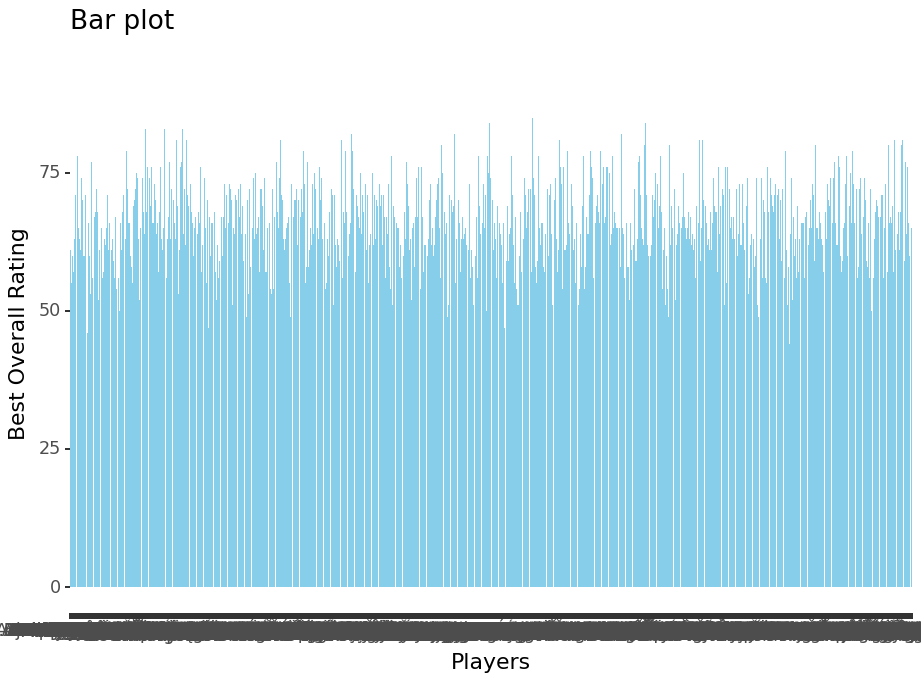

In [9]:
import pandas as pd 
from plotnine import ggplot, aes,labs,geom_line,geom_bar

bar_plot = (ggplot(Top_5_player,aes(x='Name',y='Best Overall Rating'))+
               geom_bar(stat="identity",fill="skyblue")+labs(title="Bar plot",x="Players",y="Best Overall Rating"))
print(bar_plot)